# Clustering Day 1 - Exercises

## Exercise 1

#### Question 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory and the plot directory.

In [62]:
main_dir = '/Users/datasociety/desktop/af-werx'
data_dir = main_dir + "/data"
plot_dir = main_dir + "/plot"

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm
from scipy import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [64]:
# Set working directory.
os.chdir(data_dir)
print(os.getcwd())
print(plot_dir)

/Users/datasociety/Desktop/af-werx/data
/Users/datasociety/desktop/af-werx/plot


#### Question 2

##### Load the dataset `fast_food_data.csv` and save it as `ex_subset`.

##### Print the first few rows of `ex_subset` and its summary.

##### Drop all the non-numerical columns from `ex_subset` and print the few rows again to see what the dataframe looks like.

In [65]:
ex_subset = pd.read_csv('fast_food_data.csv')

In [66]:
ex_subset.head()

,Fast Food Restaurant,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Revenue 2016 (billion dollars)
0,McDonald's,Hamburger,Burger,98,240,8.0,3.0,0.0,480,32.0,6.0,12.0,36.4
1,McDonald's,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680,33.0,7.0,15.0,36.4
2,McDonald's,Big Mac,Burger,211,530,27.0,10.0,1.0,960,47.0,9.0,24.0,36.4
3,McDonald's,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100,41.0,10.0,30.0,36.4
4,McDonald's,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470,51.0,14.0,39.0,36.4


In [67]:
ex_subset = ex_subset.select_dtypes(['number'])

In [68]:
ex_subset.head()
print(ex_subset.dtypes)

Serving Size (g)                    int64
Calories                            int64
Total Fat (g)                     float64
Saturated Fat (g)                 float64
Trans Fat (g)                     float64
Sodium (mg)                         int64
Carbs (g)                         float64
Sugars (g)                        float64
Protein (g)                       float64
Revenue 2016 (billion dollars)    float64
dtype: object


#### Question 3

##### Check how many NAs are in each column and impute them with mean. 

##### For clustering, we will be using just the `Calories` and `Sodium (mg)` columns. Drop all the other columns from `ex_subset` and name the new dataset as `ex_cluster`. 

##### Print the first few rows of `ex_cluster` to make sure we have the correct dataset.

In [69]:
print(ex_subset.isnull().sum())
ex_subset = ex_subset.fillna(ex_subset.mean())
print(ex_subset.isnull().sum())

Serving Size (g)                   0
Calories                           0
Total Fat (g)                      0
Saturated Fat (g)                  0
Trans Fat (g)                     12
Sodium (mg)                        0
Carbs (g)                          0
Sugars (g)                         0
Protein (g)                        0
Revenue 2016 (billion dollars)     0
dtype: int64
Serving Size (g)                  0
Calories                          0
Total Fat (g)                     0
Saturated Fat (g)                 0
Trans Fat (g)                     0
Sodium (mg)                       0
Carbs (g)                         0
Sugars (g)                        0
Protein (g)                       0
Revenue 2016 (billion dollars)    0
dtype: int64


In [70]:
ex_cluster = ex_subset[['Calories','Sodium (mg)']]
ex_cluster.head()

,Calories,Sodium (mg)
0,240,480
1,290,680
2,530,960
3,520,1100
4,720,1470


#### Question 4

##### In the dataset `ex_cluster`, check the data types for all of the columns. 
##### After making sure that all the data is numeric, scale the dataset and name it `ex_cluster_scaled`.
##### When the dataset is scaled, convert `ex_cluster_scaled` back to a pandas dataframe and make sure to name the columns again. 

##### Print out the first few rows of `ex_cluster_scaled` to make sure the column names are correct and are ready for clustering.

In [71]:

scaler_ex = MinMaxScaler()

# Scale the dataframe.
ex_cluster_scaled = scaler_ex.fit_transform(ex_cluster)
# Convert back to dataframe, making sure to name the columns again.
ex_cluster_scaled = pd.DataFrame(ex_cluster_scaled, 
                                 columns = ex_cluster.columns)
ex_cluster_scaled.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Calories,Sodium (mg)
0,0.099099,0.178423
1,0.144144,0.261411
2,0.360360,0.377593
3,0.351351,0.435685
4,0.531532,0.589212


#### Question 5

#####  Rename `ex_cluster_scaled` as `ex_kmeans`.
##### We will be using `ex_cluster_scaled` in other clustering models as well.
##### Plot the two variables from `ex_kmeans` to see their interactions. 
##### Plot `Sodium (mg)` as `y` and `Calories` as `x`.

In [72]:
ex_kmeans = ex_cluster_scaled

Text(0.5, 0, 'Sodium (mg)')

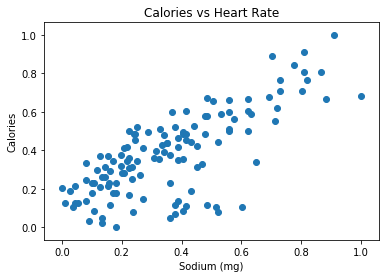

In [73]:
plt.scatter(ex_kmeans['Sodium (mg)'],
           )

plt.title('Calories vs Heart Rate')
plt.ylabel('Calories')
plt.xlabel('Sodium (mg)')

#### Question 6

##### Let's find an optimal K. 
##### Initialize the k-means with 2 clusters and name it `ex_kmeans_2`. 
##### Fit `ex_kmeans_2` with `ex_kmeans`. 
##### Predict the clusters with `ex_kmeans_2` and name the outputs as `labels`. 
##### Get the cluster centers and name it as `C`. 
##### Print `C`to see what it looks like. 


In [74]:
ex_kmeans_2 = KMeans(n_clusters = 2)

In [75]:
ex_kmeans_2 = ex_kmeans_2.fit(ex_kmeans)

In [76]:
labels = ex_kmeans_2.predict(ex_kmeans)

In [77]:
C = ex_kmeans_2.cluster_centers_
print(C)

[[0.25338085 0.28157403]
 [0.64658945 0.64777712]]


#### Question 7

##### Plot the data with clusters colored in and each centroid plotted.

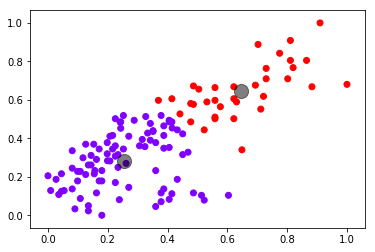

In [78]:
plt.scatter(
    ex_kmeans.iloc[:,0],
    ex_kmeans.iloc[:,1],
    c=ex_kmeans_2.labels_,
    cmap='rainbow'
)
# Second, we plot the optimized centroids over the clusters.
plt.scatter(
    C[:, 0],
    C[:, 1],
    c='black',
    s=200,
    alpha=0.5
)

## Exercise 2

#### Question 1

#####  Get the metrics we need for building an elbow plot.
##### The range for K should be from 1 to 20. 

In [79]:
# Set the range of k.
Ex_K_MAX = 20
Ex_KK = range(1,Ex_K_MAX+1)

# Run `kmeans` for values in the range i = 1-20.
Ex_KM = [kmeans(ex_kmeans,i) for i in Ex_KK]

# Find the centroids for each KM output.
Ex_centroids = [cent for (cent,var) in Ex_KM]

# Calculate centroids for each iteration of k.
ex_D_k = [cdist(ex_kmeans, cent, 'euclidean') for cent in Ex_centroids]
ex_cIdx = [np.argmin(D,axis=1) for D in ex_D_k]
ex_dist = [np.min(D,axis=1) for D in ex_D_k]

# WSS
WSS = [sum(d**2) for d in ex_dist]       # Total within-cluster sum of squares
#TSS
TSS = sum(pdist(ex_kmeans)**2)/ex_kmeans.shape[0]   # The total sum of squares
#BSS
BSS = TSS - WSS                               # The between-cluster sum of squares


In [82]:
print(Ex_KM)

[(array([[0.36260546, 0.38329711]]), 0.26834037615973727), (array([[0.23817432, 0.2633055 ],
       [0.60278651, 0.61490881]]), 0.17946219344283323), (array([[0.75770507, 0.73269273],
       [0.19883952, 0.2043463 ],
       [0.40750751, 0.46495505]]), 0.13951645568316326), (array([[0.42411642, 0.11777849],
       [0.14379162, 0.22213603],
       [0.38177247, 0.45658593],
       [0.71433934, 0.70470263]]), 0.11681862807261277), (array([[0.56470106, 0.56940777],
       [0.13936727, 0.20781627],
       [0.81981982, 0.79564315],
       [0.32948624, 0.42969609],
       [0.43693694, 0.11549101]]), 0.09990943843469054), (array([[0.8037323 , 0.77445169],
       [0.35082825, 0.44018204],
       [0.1079955 , 0.14408714],
       [0.55045045, 0.56161826],
       [0.42411642, 0.11777849],
       [0.18524775, 0.31607884]]), 0.08698858476617015), (array([[0.19148649, 0.32991701],
       [0.42411642, 0.11777849],
       [0.55045045, 0.56161826],
       [0.35082825, 0.44018204],
       [0.8037323 , 0.7

#### Question 2
##### Build an elbow curve plot for KMeans clustering and find the optimal K. 

Text(0.5, 1.0, 'Elbow for KMeans clustering')

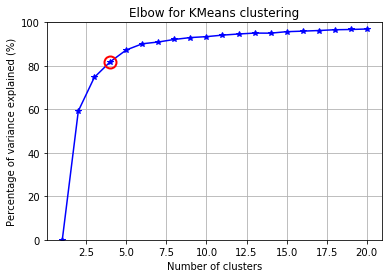

In [88]:
kIdx = 3        # K=4
clr = cm.Spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# Elbow curve - explained variance.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Ex_KK, BSS/TSS*100, 'b*-')
ax.plot(Ex_KK[kIdx], 
        BSS[kIdx]/TSS*100, 
        marker='o', 
        markersize=12,
        markeredgewidth=2, 
        markeredgecolor='r', 
        markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')


#### Question 3
##### Print the explained variance for both k = 2 and the optimal k and compare.

In [89]:
# k = 5
print(BSS[4]/TSS * 100)
# k = 2
print(BSS[2]/TSS * 100)

87.32797021105098
74.70826354234069


#### Question 4
##### Initiate a new k-means cluster classifier and name it `ex_kmeans_K`, with K being the optimal number of clusters found from question 3. 
##### Fit `ex_kmeans_K` and use the model to predict clusters and store them in a list called `labels`. 

##### Plot a scatterplot with the optimal number of clusters shown in different colors.
##### Plot the optimized centroids over the clusters.


In [90]:
ex_kmeans_K = KMeans(n_clusters = 4)

In [91]:
ex_kmeans_K = ex_kmeans_K.fit(ex_kmeans)

In [92]:
labels = ex_kmeans_K.predict(ex_kmeans)

In [93]:
C = ex_kmeans_K.cluster_centers_
print(C)

[[0.14914506 0.22835126]
 [0.75770507 0.73269273]
 [0.43693694 0.11549101]
 [0.40740306 0.473895  ]]


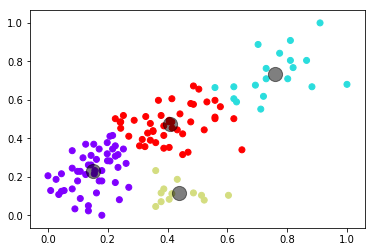

In [94]:
plt.scatter(
    ex_kmeans.iloc[:,0],
    ex_kmeans.iloc[:,1],
    c=ex_kmeans_K.labels_,
    cmap='rainbow'
)
# Second, we plot the optimized centroids over the clusters.
plt.scatter(
    C[:, 0],
    C[:, 1],
    c='black',
    s=200,
    alpha=0.5
)

#### Question 5
##### Create a new dataframe named `clustered_ex` and populate with all the columns from `ex_cluster_scaled`. 
##### Append the list of predicted cluster, `labels`, to the `clustered_ex` dataframe. 
##### Print the `clustered_ex` dataframe to inspect the clusters.

In [95]:
clustered_ex = ex_cluster_scaled

In [96]:
clustered_ex['clusters'] = pd.Series(labels)
clustered_ex.head()

,Calories,Sodium (mg),clusters
0,0.099099,0.178423,0
1,0.144144,0.261411,0
2,0.360360,0.377593,3
3,0.351351,0.435685,3
4,0.531532,0.589212,3


#### Question 6
##### Group the `clustered_ex` dataframe by `cluster` to see the group mean of each variable.
##### Name the new dataframe as `ex_cluster_groups_means`. 
##### Print `ex_cluster_groups_means` to inspect each clusters.


In [97]:
ex_cluster_groups_means = clustered_ex.groupby('clusters').mean()
print(ex_cluster_groups_means)


          Calories  Sodium (mg)
clusters                       
0         0.149145     0.228351
1         0.757705     0.732693
2         0.436937     0.115491
3         0.407403     0.473895


## Exercise 3

#### Question 1

#### Let's use the `ex_cluster_scaled` for hierarchical clustering in this exercise. 
#### Compute the distance matrix of `ex_cluster_scaled` using `pdist()` function.
#### Save  as `ex_dist`.

In [120]:
ex_scaled_subset = ex_cluster_scaled
# Calculate the distance matrix.
ex_dist = pdist(ex_cluster_scaled, 'euclidean')
ex_dist

array([0.09442452, 3.01793409, 3.02155831, ..., 3.05077806, 1.10506499,
       2.00794184])

#### Question 2
##### Perform hierarchical clustering using the `linkage()` function on the distance matrix `ex_dist`.
##### Save as `ex_linked` and print the first 5 results.

In [115]:
ex_linked = linkage(ex_dist, 'ward')
ex_linked[:5]

array([[8.40000000e+01, 1.03000000e+02, 2.44974759e-03, 2.00000000e+00],
       [3.00000000e+00, 6.40000000e+01, 4.14937759e-03, 2.00000000e+00],
       [7.50000000e+01, 9.70000000e+01, 8.20310778e-03, 2.00000000e+00],
       [5.00000000e+00, 1.40000000e+01, 8.29875519e-03, 2.00000000e+00],
       [2.40000000e+01, 6.70000000e+01, 8.29875519e-03, 2.00000000e+00]])

#### Question 3

##### Let's use the linkage matrix `ex_linked` to visualize our dendrogram. Set the figure size to 12 and 10, respectively, and name the plot "Dendrogram".

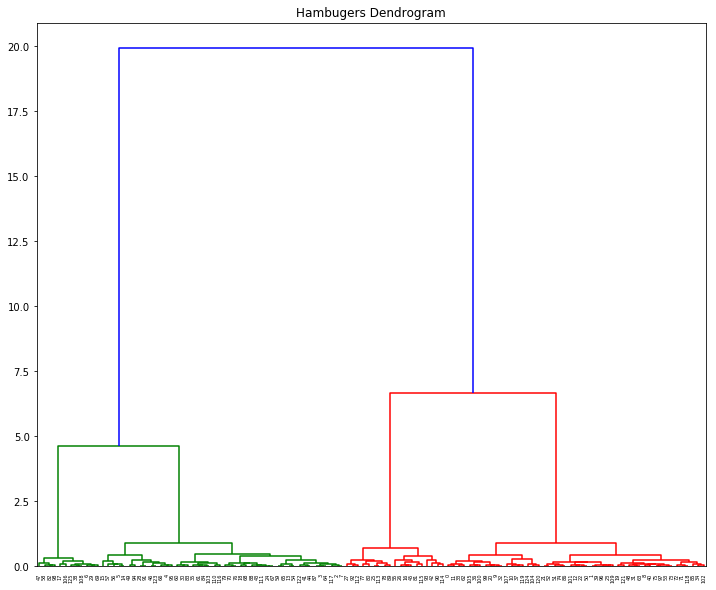

In [116]:
plt.figure(figsize = (12, 10))
plt.title('Hambugers Dendrogram')
ex_dendo = dendrogram(ex_linked)
plt.show()

#### Question 4 
##### Prune the dendrogram created above to view the last 10 merges / leaf nodes.
##### Set the `truncate_mode` as `lastp` in the `dendrogram()` function. Name the plot "Hierarchical Clustering Dendrogram (pruned)". Set show_leaf_counts to False, leaf_rotation to 90, leaf_font_size to 12, and show_contracted to True.

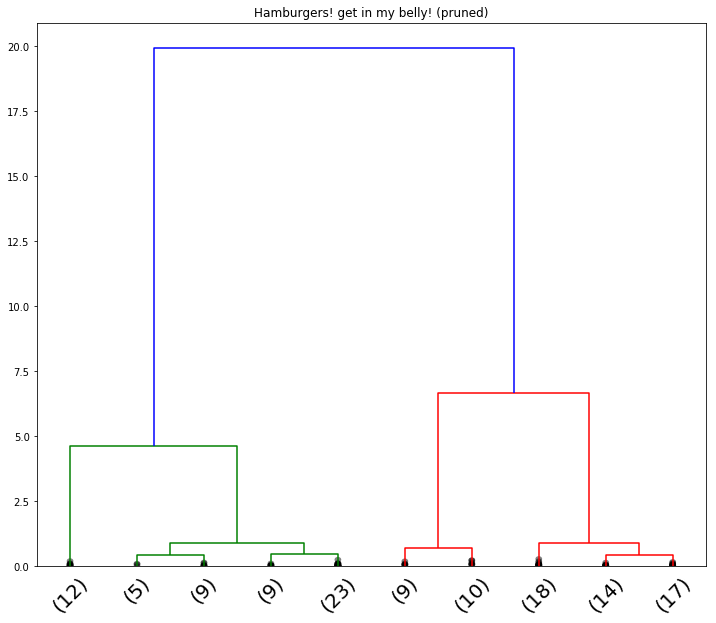

In [117]:
plt.figure(figsize=(12,10))
plt.title('Hamburgers! get in my belly! (pruned)')
dendrogram(ex_linked,
           truncate_mode='lastp',   
           p = 10,                 
           leaf_rotation=45,
           leaf_font_size=20,
           show_contracted=True,   
)
plt.show()


#### Question 5
##### Cut the above dendrogram by drawing a horizontal line to view 3 clusters. Set the color to 'grey', line width to 1, and line style to 'dashed'. 
##### Use `plt.axhline()` to draw the line across the dendrogram.
##### At what distance on the y-axis should the line be drawn to get 3 clusters?

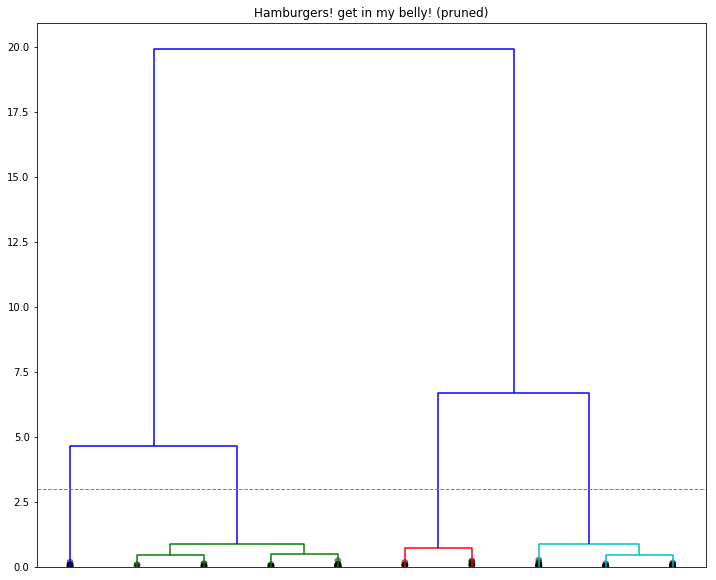

In [124]:
plt.figure(figsize=(12,10))
plt.title('Hamburgers! get in my belly! (pruned)')
dendrogram(ex_linked,
           truncate_mode='lastp',   
           p = 10,
           show_leaf_counts = False,
           leaf_rotation=45,
           leaf_font_size=20,
           show_contracted=True,
           color_threshold = 2
)
plt.axhline(y=3, c='grey', lw=1, linestyle = 'dashed')
plt.show()


##### We should set the distance around 4 on the y-axis to get 3 clusters.

#### Question 6
##### Now let's use the second method for hierarchical clustering using the `AgglomerativeClustering()` function.
##### Instantiate the function and save it to `ex_clusters`. Set the number of clusters as 3.
##### Fit and predict with `ex_scaled_subset`.
##### Print the labels of `ex_clusters`.

In [121]:
ex_clusters = AgglomerativeClustering(n_clusters = 3,   
                                              affinity = 'euclidean',
                                              linkage = 'ward')

ex_clusters.fit_predict(ex_scaled_subset)
print(ex_clusters.labels_)

[1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 2 0 0 1 1 1 1 1 0 2 2 2 0 0 0 1 1 1 1 0 1
 1 0 1 1 0 2 0 0 2 0 0 1 0 1 1 1 1 0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 1 1 0 2 2 0 2 2 0 0 0 1 1 0 0 2 2 0 2 2 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0
 0 2 2 2 2 0 0 1 1 1 1 0 0 1 0]


#### Question 7
##### Now create the scatterplot and set `c` as the labels of `ex_clusters`.
##### in the `scatterplot()` function. Plot `Sodium (mg)` on the x axis, and '`Calories` on the y axis, and name them accordingly. Set the cmap argument to 'rainbow'.

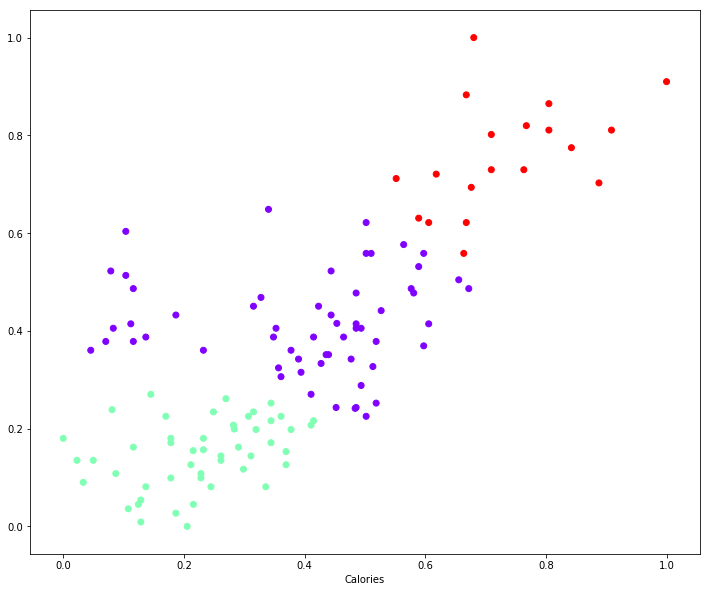

In [123]:
plt.figure(figsize = (12,10))
plt.xlabel('Sodium (mg)')
plt.xlabel('Calories')
plt.scatter(ex_scaled_subset['Sodium (mg)'],
            ex_scaled_subset['Calories'],
            c = ex_clusters.labels_, cmap = 'rainbow') 